## Exploración de un fichero

Abrir el fichero para vercomo se visualiza un unico fichero y como limpiar el fichero inicial.

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## **Versions Used**

In [2]:
print("Python version:", sys.version)
print('Pandas version:', pd.__version__)
#print('matplotlib version:', plt.__version__)
print('Numpy version:', np.__version__)
#print('Scipy version:', sp.__version__)
#print('scikit-learn version:', sklearn.linear_model.__version__)

Python version: 3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
Pandas version: 0.23.4
Numpy version: 1.19.5


In [3]:
root = 'España en Argentina_2.xls'

Abrir fichero y explorarlo

In [4]:
df_arg = pd.read_excel(root, header=1)
df_arg.head()

WARNING *** file size (32704) not 512 + multiple of sector size (512)


,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,...,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",16.84,171.65,NaN,212.76,NaN,1878.3,32.91,NaN,...,0,0,0,0,0,2058.76,500,11.94,NaN,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,3736.37,1775.7,8870.99,139.92,777.61,1573.47,...,1307.35,0,0,433.12,0,595.79,1227.5,808.3,190.2,39.07
3,NaN,03 PESCA Y ACUICULTURA,264.82,120.55,602.08,50.2,1142.54,4756.08,0,5781.05,...,0,0,400.53,0,0,0,0,NaN,NaN,521.34
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_arg.columns

Index(['Elemento', 'Unnamed: 1', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Eliminar la primera fila

In [6]:
df_arg_2= df_arg.drop([0], axis=0)
df_arg_2.head()

,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",16.84,171.65,NaN,212.76,NaN,1878.3,32.91,NaN,...,0,0,0,0,0,2058.76,500,11.94,NaN,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,3736.37,1775.7,8870.99,139.92,777.61,1573.47,...,1307.35,0,0,433.12,0,595.79,1227.5,808.3,190.2,39.07
3,NaN,03 PESCA Y ACUICULTURA,264.82,120.55,602.08,50.2,1142.54,4756.08,0,5781.05,...,0,0,400.53,0,0,0,0,NaN,NaN,521.34
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
# Renombrar columnas

df_arg_2.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'country'}, inplace=True)
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",16.84,171.65,NaN,212.76,NaN,1878.3,32.91,NaN,...,0,0,0,0,0,2058.76,500,11.94,NaN,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,3736.37,1775.7,8870.99,139.92,777.61,1573.47,...,1307.35,0,0,433.12,0,595.79,1227.5,808.3,190.2,39.07
3,NaN,03 PESCA Y ACUICULTURA,264.82,120.55,602.08,50.2,1142.54,4756.08,0,5781.05,...,0,0,400.53,0,0,0,0,NaN,NaN,521.34
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [8]:
# Completar la columna 'Country' con el nombre del país

df_arg_2['country'] = df_arg_2['country'].replace(np.nan, 'ARGENTINA')
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",16.84,171.65,NaN,212.76,NaN,1878.3,32.91,NaN,...,0,0,0,0,0,2058.76,500,11.94,NaN,NaN
2,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,3736.37,1775.7,8870.99,139.92,777.61,1573.47,...,1307.35,0,0,433.12,0,595.79,1227.5,808.3,190.2,39.07
3,ARGENTINA,03 PESCA Y ACUICULTURA,264.82,120.55,602.08,50.2,1142.54,4756.08,0,5781.05,...,0,0,400.53,0,0,0,0,NaN,NaN,521.34
4,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,NaN


In [9]:
df_arg_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1 to 89
Data columns (total 30 columns):
country     89 non-null object
industry    89 non-null object
1993        23 non-null object
1994        29 non-null object
1995        35 non-null object
1996        33 non-null object
1997        34 non-null object
1998        46 non-null object
1999        49 non-null object
2000        46 non-null object
2001        41 non-null object
2002        35 non-null object
2003        30 non-null object
2004        32 non-null object
2005        42 non-null object
2006        30 non-null object
2007        62 non-null object
2008        59 non-null object
2009        60 non-null object
2010        64 non-null object
2011        63 non-null object
2012        62 non-null object
2013        59 non-null object
2014        56 non-null object
2015        55 non-null object
2016        56 non-null object
2017        57 non-null object
2018        51 non-null object
2019        16 non-null objec

In [10]:
df_arg_2.isnull().sum()

country      0
industry     0
1993        66
1994        60
1995        54
1996        56
1997        55
1998        43
1999        40
2000        43
2001        48
2002        54
2003        59
2004        57
2005        47
2006        59
2007        27
2008        30
2009        29
2010        25
2011        26
2012        27
2013        30
2014        33
2015        34
2016        33
2017        32
2018        38
2019        73
2020        77
dtype: int64

In [11]:
# Sustituir valores NaN por 0. Lo sustituimos por 0 porque ese año no hay registrado ningun valor de inversión

df_arg_2 = df_arg_2.fillna(0)
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",16.84,171.65,0.00,212.76,0.00,1878.30,32.91,0.00,...,0.00,0.0,0.00,0.00,0.0,2058.76,500.0,11.94,0.0,0.00
2,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0.00,0.00,3736.37,1775.70,8870.99,139.92,777.61,1573.47,...,1307.35,0.0,0.00,433.12,0.0,595.79,1227.5,808.30,190.2,39.07
3,ARGENTINA,03 PESCA Y ACUICULTURA,264.82,120.55,602.08,50.20,1142.54,4756.08,0.00,5781.05,...,0.00,0.0,400.53,0.00,0.0,0.00,0.0,0.00,0.0,521.34
4,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00
5,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00


In [12]:
df_arg_2.dtypes

country      object
industry     object
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
dtype: object

In [13]:
df_arg_2.dtypes

country      object
industry     object
1993        float64
1994        float64
1995        float64
1996        float64
1997        float64
1998        float64
1999        float64
2000        float64
2001        float64
2002        float64
2003        float64
2004        float64
2005        float64
2006        float64
2007        float64
2008        float64
2009        float64
2010        float64
2011        float64
2012        float64
2013        float64
2014        float64
2015        float64
2016        float64
2017        float64
2018        float64
2019        float64
2020        float64
dtype: object

In [14]:
df_arg_2.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",16.84,171.65,0.00,212.76,0.00,1878.30,32.91,0.00,...,0.00,0.0,0.00,0.00,0.0,2058.76,500.0,11.94,0.0,0.00
2,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,0.00,0.00,3736.37,1775.70,8870.99,139.92,777.61,1573.47,...,1307.35,0.0,0.00,433.12,0.0,595.79,1227.5,808.30,190.2,39.07
3,ARGENTINA,03 PESCA Y ACUICULTURA,264.82,120.55,602.08,50.20,1142.54,4756.08,0.00,5781.05,...,0.00,0.0,400.53,0.00,0.0,0.00,0.0,0.00,0.0,521.34
4,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00
5,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00


In [15]:
df_arg_3 = df_arg_2.melt(['industry','country'])

In [16]:
df_arg_3.head()

,industry,country,variable,value
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",ARGENTINA,1993,16.84
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,ARGENTINA,1993,0.00
2,03 PESCA Y ACUICULTURA,ARGENTINA,1993,264.82
3,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",ARGENTINA,1993,0.00
4,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,ARGENTINA,1993,0.00


In [17]:
df_arg_3 = df_arg_3[['variable','value','country', 'industry']]
df_arg_3.head()

,variable,value,country,industry
0,1993,16.84,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,0.00,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,264.82,ARGENTINA,03 PESCA Y ACUICULTURA
3,1993,0.00,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,0.00,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [18]:
df_arg_3.rename(columns={'variable':'year',
                        'value': 'investment'}, inplace=True)
df_arg_3.head()

,year,investment,country,industry
0,1993,16.84,ARGENTINA,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,0.00,ARGENTINA,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,264.82,ARGENTINA,03 PESCA Y ACUICULTURA
3,1993,0.00,ARGENTINA,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,0.00,ARGENTINA,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


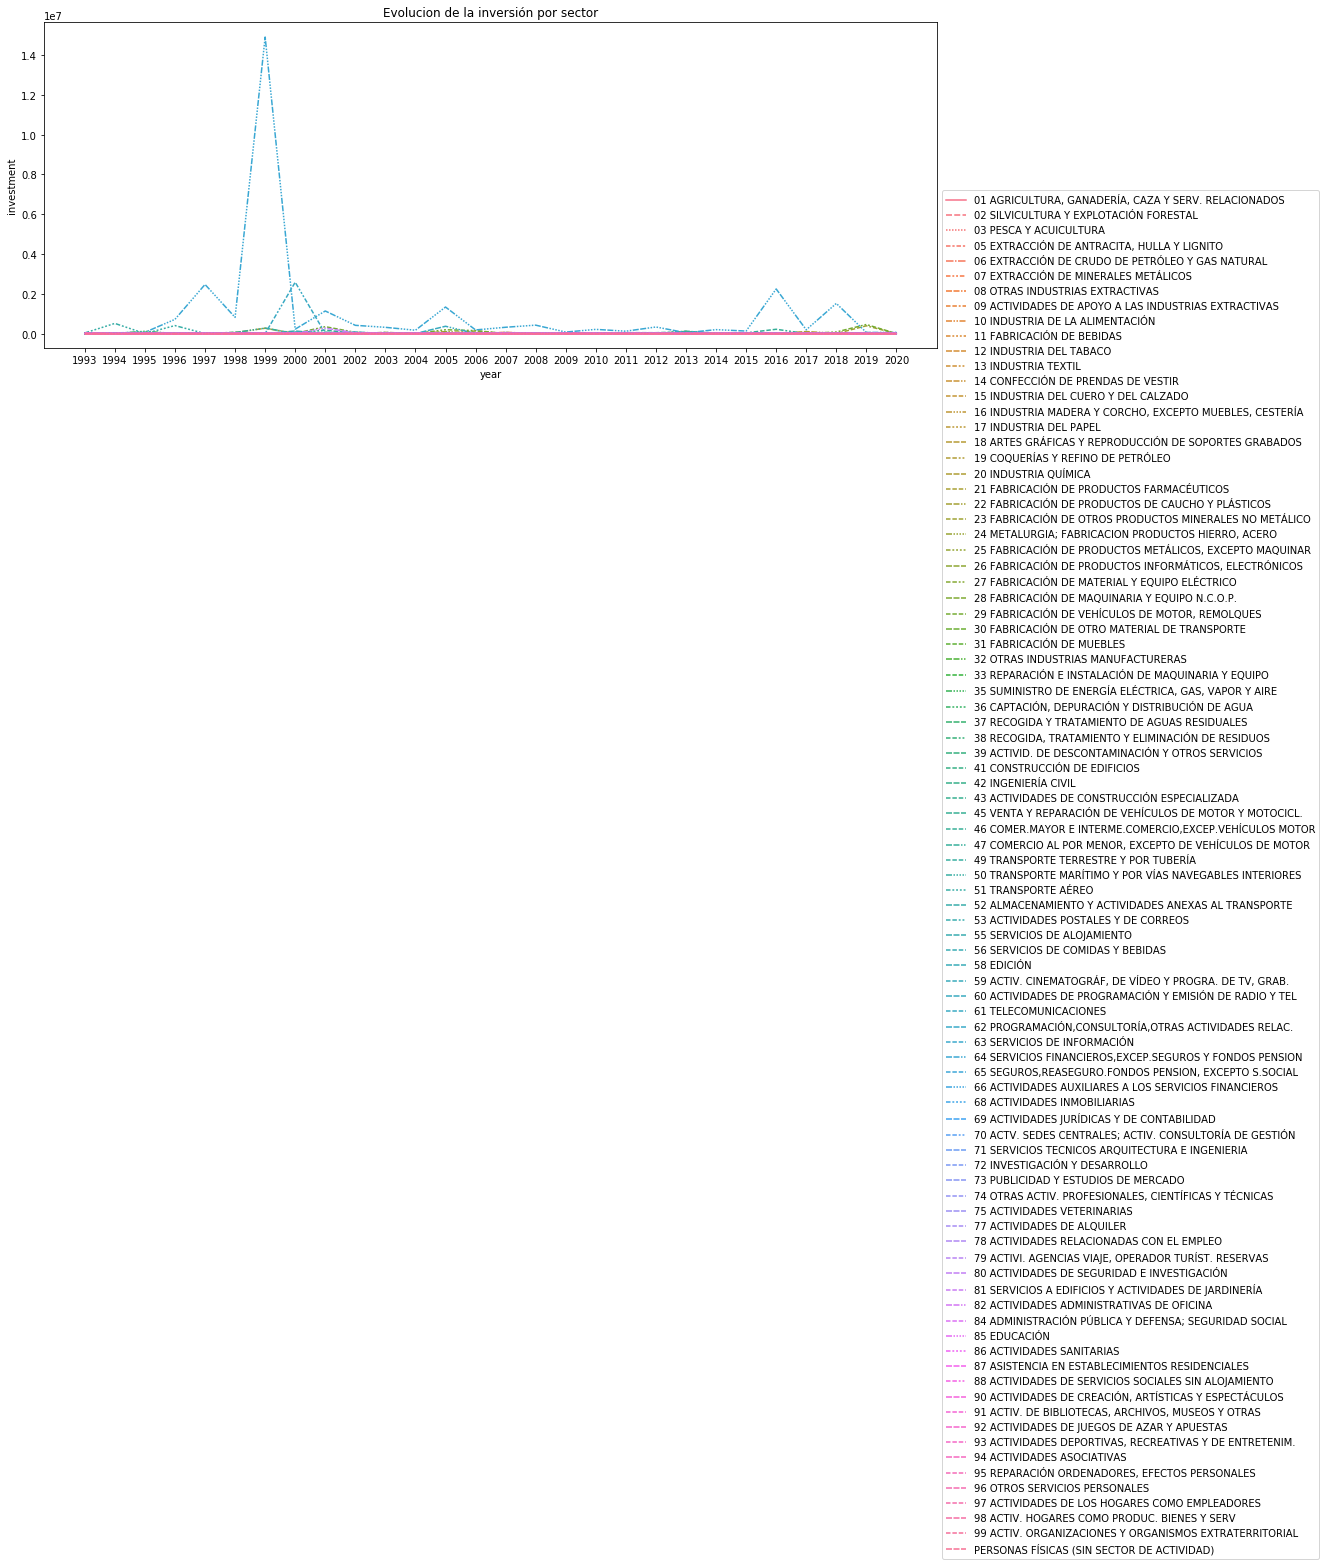

In [19]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df_arg_3, x='year', y='investment', hue='industry', style='industry');
plt.title('Evolucion de la inversión por sector')
plt.legend(loc='best', bbox_to_anchor=(1, 0., 0. ,0.5))

In [20]:
lr = LinearRegression()
tree = DecisionTreeRegressor()

In [21]:
df_arg_sum = df_arg_3.groupby('year')['investment'].sum().reset_index()
df_arg_sum.head()

,year,investment
0,1993,122415.35
1,1994,581152.83
2,1995,229211.55
3,1996,1179473.44
4,1997,2547275.12


In [24]:
df_arg_sum.set_index('year', inplace=True)

In [28]:
df_arg_sum.tail()

,year,investment
23,2016,2517316.16
24,2017,373771.79
25,2018,1678515.58
26,2019,979672.92
27,2020,105962.64


In [22]:
df_arg_sum.dtypes

year           object
investment    float64
dtype: object

Text(0.5, 1.0, 'Evolucion de la inversión total del país')

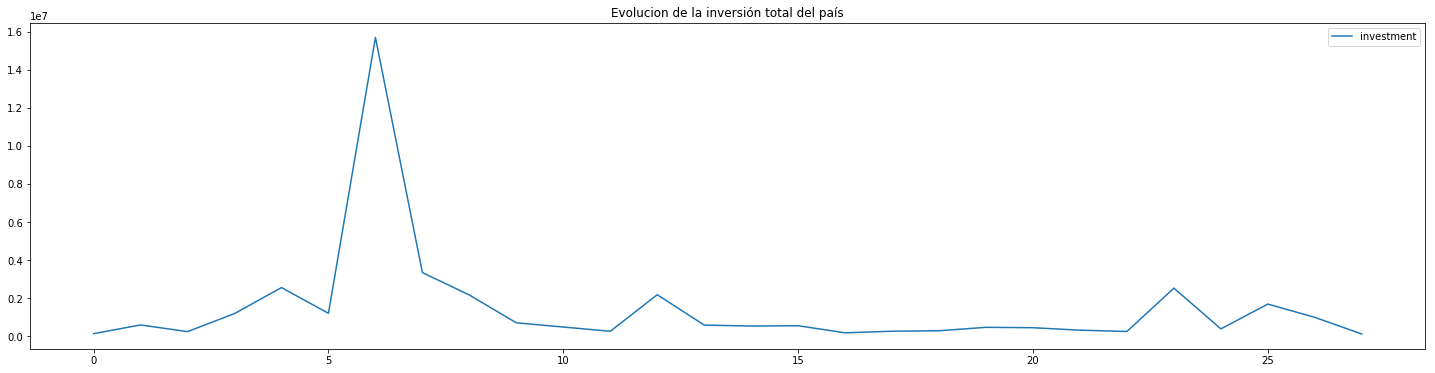

In [23]:
plt.figure(figsize=(25,6))
sns.lineplot(data=df_arg_sum)
plt.title('Evolucion de la inversión total del país')

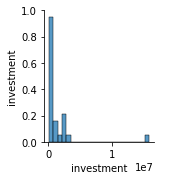

In [36]:
sns.pairplot(df_arg_sum)

In [29]:
xs = df_arg_sum['year']
ys = df_arg_sum['investment']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(xs, ys)

In [31]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (21,)
y_train shape: (21,)


In [32]:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (7,)
y_test shape: (7,)


In [38]:
lr.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
ys_hat = lr.predict(X_test.values.reshape(-1, 1))

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

f1_score(y_test, ys_hat)

ValueError: continuous is not supported

In [45]:
ys_hat

array([1528760.93219143,  605237.16349593, 1315640.06249249,
        747317.74329525, 1173559.48269317, 1102519.19279352,
        960438.61299419])